<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/cha03_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 3. 다층 퍼셉트론**

In [ ]:
# 중간층이 2개인 MLP 구조
# 단순히 선형 계층을 연결하기만 하면 결과적으로 전체가 선형 함수가 되어 버리므로
# 각 층의 출력에는 활성화 함수(activation function)라는 비선형 함수를 적용해서 전체적으로도 비선형 함수가 되도록 한다.


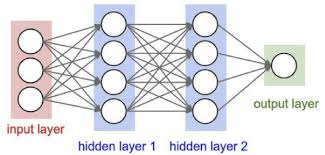

In [3]:
# 손글씨 문자를 판별하는 MLP 작성
import torch
from torch import nn

net=nn.Sequential(
  nn.Linear(64,32),
  nn.ReLU(),
  nn.Linear(32,16),
  nn.ReLU(),
  nn.Linear(16,10)
)

# nn.Sequential: nn.Module층을 차례로 쌓아서 신경망을 구축할 때 사용.
# 이와 같이 층이 일직선으로 쌓인 형태의 신경망: 피드포워드형: Feedforward

**손글씨 문자 데이터의 학습 코드의 나머지 부분**

In [4]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
digits=load_digits()

x=digits.data
y=digits.target

x=torch.tensor(x, dtype=torch.float32)
y=torch.tensor(y, dtype=torch.int64)

# 소프트맥스 크로스 엔트로피
loss_fn=nn.CrossEntropyLoss()

# Adam
optimizer=optim.Adam(net.parameters())

# 손실함수의 로그
losses=[]

for epoc in range(100):
  optimizer.zero_grad()

  y_pred=net(x)

  loss=loss_fn(y_pred, y)
  loss.backward()

  optimizer.step()

  losses.append(loss.item())

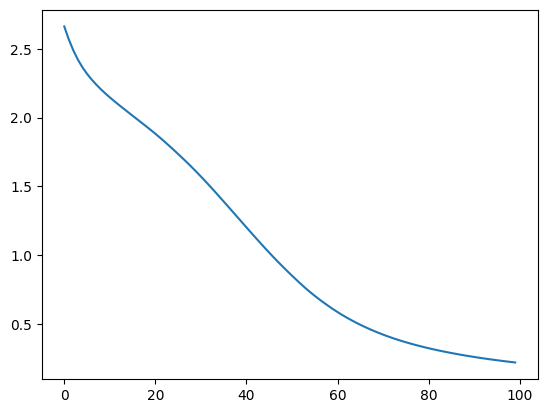

In [5]:
from matplotlib import pyplot as plt
plt.plot(losses)

**Dataset과 DataLoader**

In [ ]:
# 지금까지는 모든 데이터를 모아서 학습용으로 사용했지만, 데이터가 늘어나거나 신경망 계층의 증가, 또는 파라미터가 늘어나면
# 전체 데이터를 메모리에서 처리하기 어려워진다. 여기서는 이 문제를 해결하기 위해 데이터의 일부 배치(mini-batch)만 사용하는 SGD 학습법을 보도록 한다.

In [8]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

# dataset 작성
ds=TensorDataset(x,y)

loader=DataLoader(ds, batch_size=64, shuffle=True)

net=nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [9]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(net.parameters())

In [12]:
# 최적화 실행
losses=[]
for epoch in range(10):
  running_loss=0.0
  for xx, yy in loader:
    y_pred=net(xx)
    loss=loss_fn(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  losses.append(running_loss)

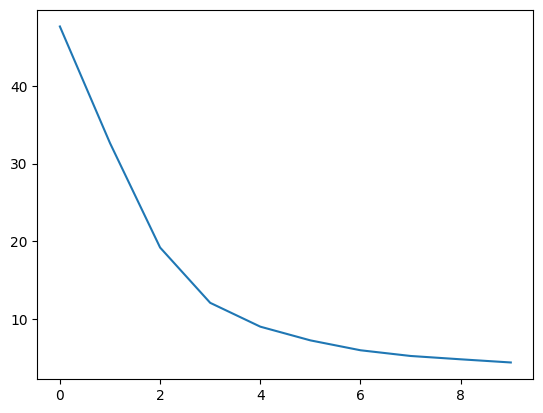

In [13]:
from matplotlib import pyplot as plt
plt.plot(losses)

In [15]:
xq=torch.tensor([[1,2,3],[2,3,4]])
yq=torch.tensor([[1,2,3],[2,3,4]])

z=TensorDataset(xq,yq)
z[1]

(tensor([2, 3, 4]), tensor([2, 3, 4]))

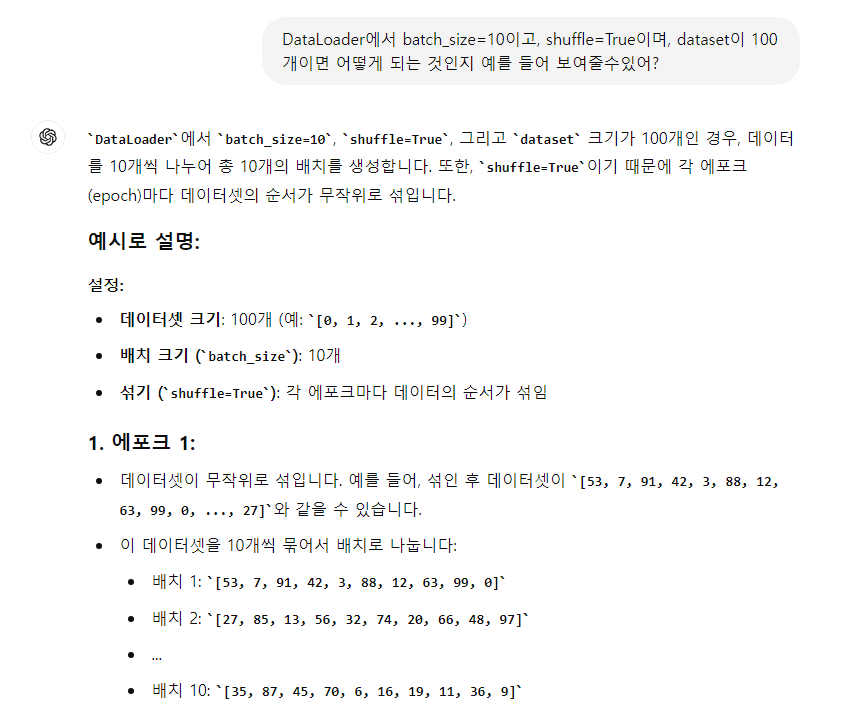

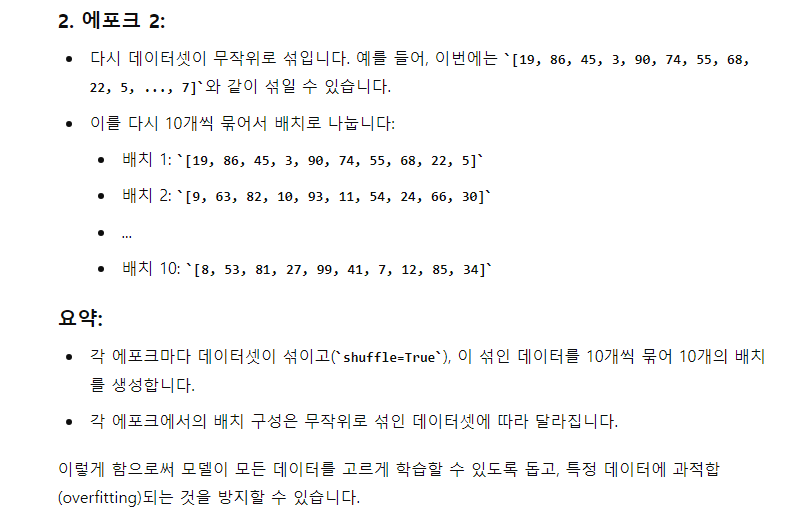